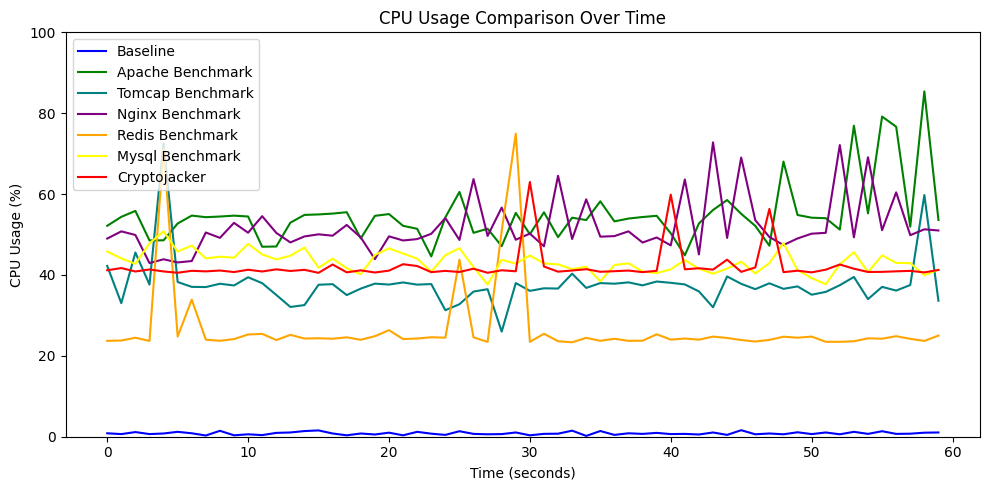

In [31]:
import glob
import re
import pandas as pd
import matplotlib.pyplot as plt

file_paths = glob.glob('baseline.txt') + glob.glob('apachebench_10.txt') + glob.glob('tomcatbench_10.txt') + glob.glob('nginxbench_10.txt')  + glob.glob('redisbench_10.txt') + glob.glob('mysqlbench_10.txt') + glob.glob('throttle_40.txt')
data = []

colors = {
    'baseline.txt': 'blue',
    'apachebench_10.txt': 'green',
    'tomcatbench_10.txt': 'teal',
    'nginxbench_10.txt': 'purple',
    'redisbench_10.txt': 'orange',
    'mysqlbench_10.txt': 'yellow',
    'throttle_40.txt': 'red'
}

labels = {
    'baseline.txt': 'Baseline',
    'apachebench_10.txt': 'Apache Benchmark',
    'tomcatbench_10.txt': 'Tomcap Benchmark',
    'nginxbench_10.txt': 'Nginx Benchmark',
    'redisbench_10.txt': 'Redis Benchmark',
    'mysqlbench_10.txt': 'Mysql Benchmark',
    'throttle_40.txt': 'Cryptojacker'
}

for file_path in file_paths:
    with open(file_path, 'r') as file:
        lines = file.readlines()
        second = 0
        for line in lines:
            match = re.search(r'\d+:\d+:\d+\s+all.*?(\d+\.\d+)$', line)
            if match:
                idle_cpu_usage = float(match.group(1))
                cpu_usage = 100 - idle_cpu_usage
                data.append([file_path, second, cpu_usage])
                second += 1

df = pd.DataFrame(data, columns=['File', 'Second', 'CPU_Usage'])

plt.figure(figsize=(10, 5))
for file_path in df['File'].unique():
    subset = df[df['File'] == file_path]
    plt.plot(subset['Second'], subset['CPU_Usage'], label=labels[file_path], color=colors[file_path])

plt.rcParams['font.size'] = 10
plt.xlabel('Time (seconds)')
plt.ylabel('CPU Usage (%)')
plt.ylim(0, 100)
plt.title('CPU Usage Comparison Over Time')
plt.legend()
plt.tight_layout()
plt.savefig('CPU_benchmark.pdf', dpi=1000)
plt.show()